In [1]:
%matplotlib inline
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import xarray as xr
from utils import RESULTS_ROOT

ORDERED_FOLDERS = [
    "20210916_4microstates_2.0-20.0Hz_EC_subjectwise",
    # "20211018_FTsurrs_4microstates_2.0-20.0Hz_EC_subjectwise",
    # "20211019_AAFTsurrs_4microstates_2.0-20.0Hz_EC_subjectwise",
    # "20211020_IAAFTsurrs_4microstates_2.0-20.0Hz_EC_subjectwise",
    # "20211020_SHUFFLEsurrs_4microstates_2.0-20.0Hz_EC_subjectwise",
    "20211119_FTsurrs_4microstates_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211120_AAFTsurrs_4microstates_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211120_IAAFTsurrs_4microstates_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211120_SHUFFLEsurrs_4microstates_2.0-20.0Hz_EC_seeded_subjectwise",
    "20210917_4PCA_2.0-20.0Hz_EC_subjectwise",
    # "20211020_FTsurrs_4PCA_2.0-20.0Hz_EC_subjectwise",
    # "20211020_AAFTsurrs_4PCA_2.0-20.0Hz_EC_subjectwise",
    # "20211020_IAAFTsurrs_4PCA_2.0-20.0Hz_EC_subjectwise",
    # "20211020_SHUFFLEsurrs_4PCA_2.0-20.0Hz_EC_subjectwise",
    "20211120_FTsurrs_4PCA_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211121_AAFTsurrs_4PCA_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211121_IAAFTsurrs_4PCA_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211120_SHUFFLEsurrs_4PCA_2.0-20.0Hz_EC_seeded_subjectwise",
    "20210917_4ICA_2.0-20.0Hz_EC_subjectwise",
    # "20211020_FTsurrs_4ICA_2.0-20.0Hz_EC_subjectwise",
    # "20211020_AAFTsurrs_4ICA_2.0-20.0Hz_EC_subjectwise",
    # "20211020_IAAFTsurrs_4ICA_2.0-20.0Hz_EC_subjectwise",
    # "20211020_SHUFFLEsurrs_4ICA_2.0-20.0Hz_EC_subjectwise",
    "20211120_FTsurrs_4ICA_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211120_AAFTsurrs_4ICA_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211120_IAAFTsurrs_4ICA_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211120_SHUFFLEsurrs_4ICA_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211025_4hmm_2.0-20.0Hz_EC_subjectwise",
    # "20211025_FTsurrs_4hmm_2.0-20.0Hz_EC_subjectwise",
    # "20211025_AAFTsurrs_4hmm_2.0-20.0Hz_EC_subjectwise",
    # "20211025_IAAFTsurrs_4hmm_2.0-20.0Hz_EC_subjectwise",
    # "20211025_SHUFFLEsurrs_4hmm_2.0-20.0Hz_EC_subjectwise",
    "20211120_FTsurrs_4hmm_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211120_AAFTsurrs_4hmm_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211120_IAAFTsurrs_4hmm_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211120_SHUFFLEsurrs_4hmm_2.0-20.0Hz_EC_seeded_subjectwise",
]

fold_names = [
    "-".join(fold.split("_")[1:3]).replace("-2.0-20.0Hz", "")
    for fold in ORDERED_FOLDERS
]

RESULTS_FOLDER = os.path.join(RESULTS_ROOT, "aggregated")

In [2]:
def plot_matrix_w_annot(array, annot=True, mask_pvals=False, title=""):
    plt.figure(figsize=(12, 10))
    if annot and array.ndim == 3:
        annot = np.tril(array[..., 0], k=-1)
        annot += np.triu(array[..., 1], k=1)
        annot[np.eye(annot.shape[0], dtype=bool)] = np.nan
        mask = np.isnan(annot)
    else:
        mask = np.zeros((array.shape[0], array.shape[1]), dtype=bool)
    plot_array = array if array.ndim == 2 else array[..., 0]
    if mask_pvals:
        mask = np.logical_or(array[..., 1] > 0.05, mask)
    sns.heatmap(
        plot_array,
        square=True,
        annot=annot,
        mask=mask,
        fmt=".2f",
        annot_kws={"size": 9},
    )
    for line in np.arange(5, array.shape[0], 5):
        plt.axhline(line, color="w")
        plt.axvline(line, color="w")
    xlims = plt.gca().get_xlim()
    ylims = plt.gca().get_ylim()
    plt.plot(
        [xlims[0], xlims[1]],
        [ylims[1], ylims[0]],
        "--",
        color=plt.rcParams["text.color"],
        linewidth=1.0,
    )
    _ = plt.yticks(
        ticks=np.arange(20) + 0.5,
        labels=["data", "FT", "AAFT", "IAAFT", "shuffle"] * 4,
        rotation=0,
    )
    _ = plt.xticks(
        ticks=np.arange(20) + 0.5,
        labels=["data", "FT", "AAFT", "IAAFT", "shuffle"] * 4,
        rotation=90,
    )
    for pos, method in enumerate(["microstates", "PCA", "ICA", "HMM"]):
        plt.text(
            -4, 2.5 + 5 * pos, method, size=20, ha="left", rotation=90, va="center"
        )
        plt.text(2.5 + 5 * pos, 24, method, size=20, ha="center")
    plt.title(title)

In [3]:
all_dfs = []
for fold in ORDERED_FOLDERS:
    df = pd.read_csv(os.path.join(RESULTS_ROOT, fold, "latent_stats.csv"), index_col=0)
    all_dfs.append(df)

In [4]:
state_names = ["all", "A", "B", "C", "D"]
variables = ["coverage", "occurrence", "lifespan"]

t_stats = np.zeros(
    (len(variables), len(state_names), len(ORDERED_FOLDERS), len(ORDERED_FOLDERS), 2)
)
for i in range(len(ORDERED_FOLDERS)):
    for j in range(len(ORDERED_FOLDERS)):
        df1 = all_dfs[i]
        df2 = all_dfs[j]
        for k, var in enumerate(variables):
            for ms in range(len(state_names)):
                state_n = state_names[ms]
                if state_n == "all":
                    ttest = pg.ttest(
                        df1[var],
                        df2[var],
                    )
                else:
                    ttest = pg.ttest(
                        df1[df1["latent map"] == state_n][var],
                        df2[df2["latent map"] == state_n][var],
                    )
                t_stats[k, ms, i, j, 0] = ttest.loc["T-test", "T"]
                t_stats[k, ms, i, j, 1] = ttest.loc["T-test", "p-val"]

/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/pingouin/bayesian.py:146: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/pingouin/bayesian.py:146: RuntimeWarning: overflow encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


In [5]:
xr.DataArray(
    t_stats,
    dims=["variable", "state", "decomp_type1", "decomp_type2", "value"],
    coords={
        "variable": variables,
        "state": state_names,
        "decomp_type1": fold_names,
        "decomp_type2": fold_names,
        "value": ["measure", "p-value"],
    },
).to_netcdf(os.path.join(RESULTS_FOLDER, "state_stats_EC_seeded.nc"))

/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


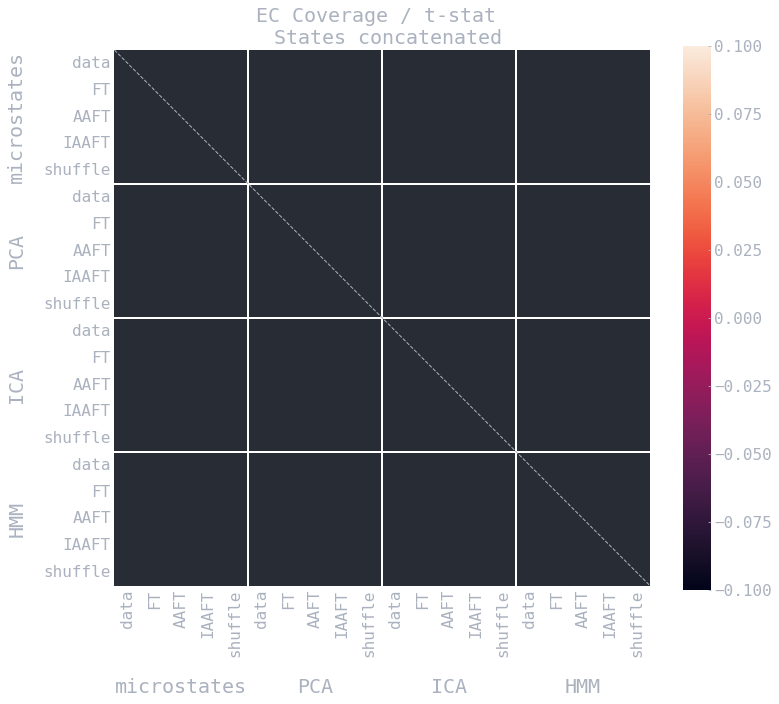

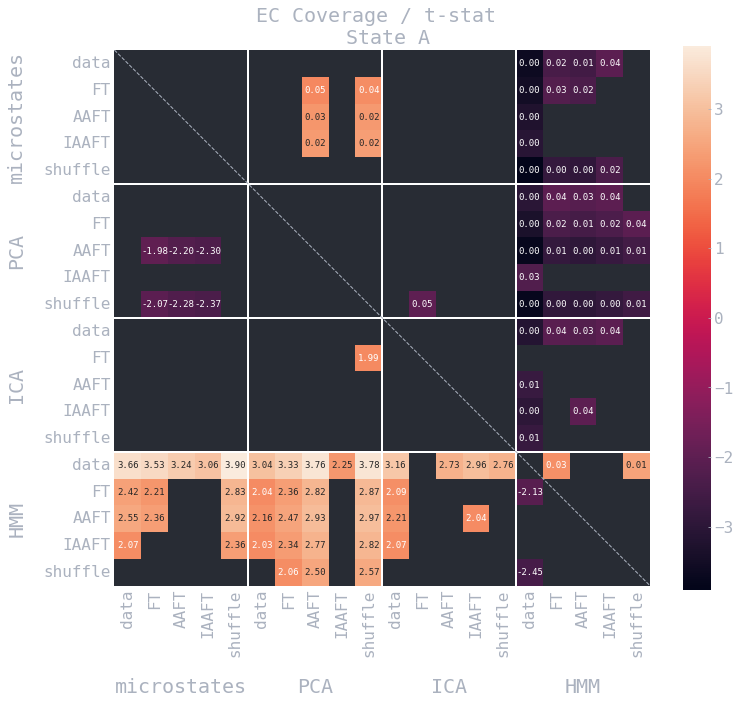

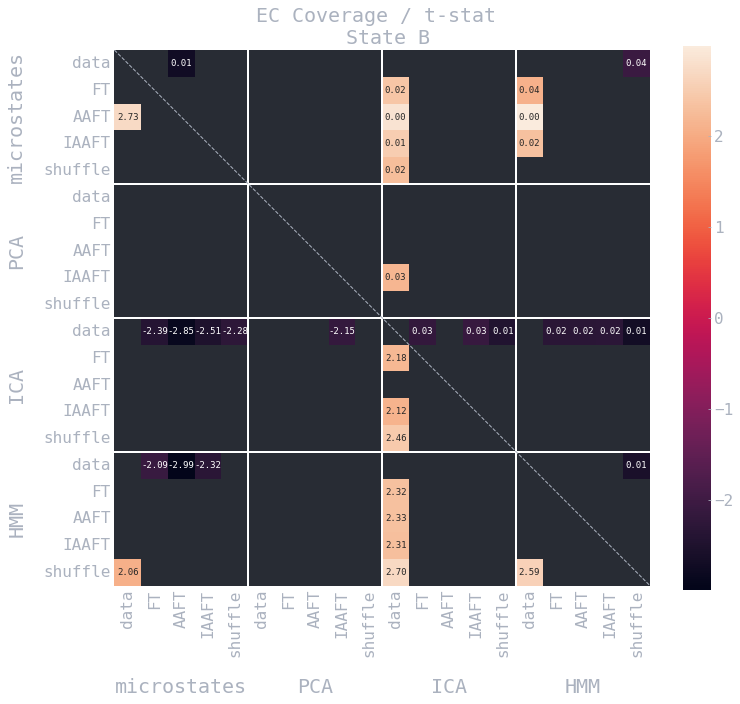

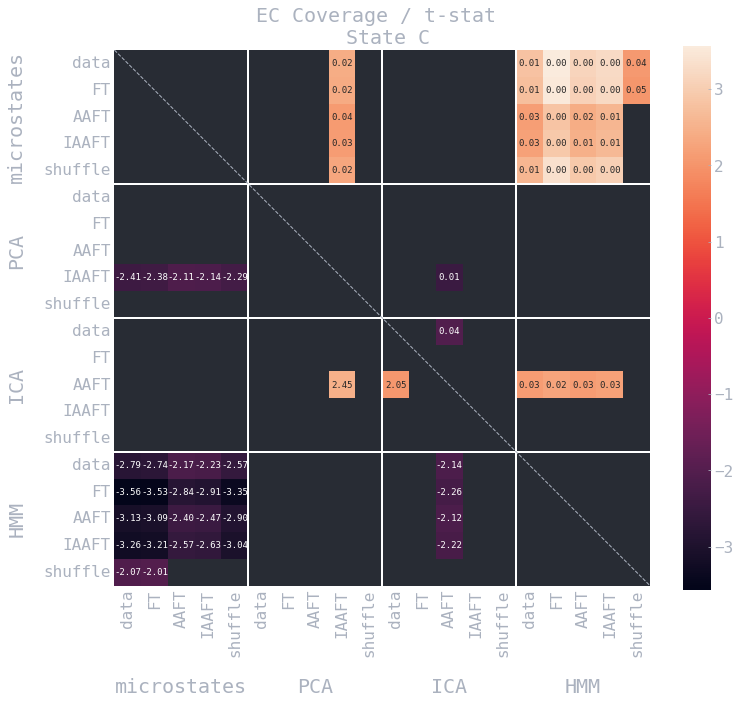

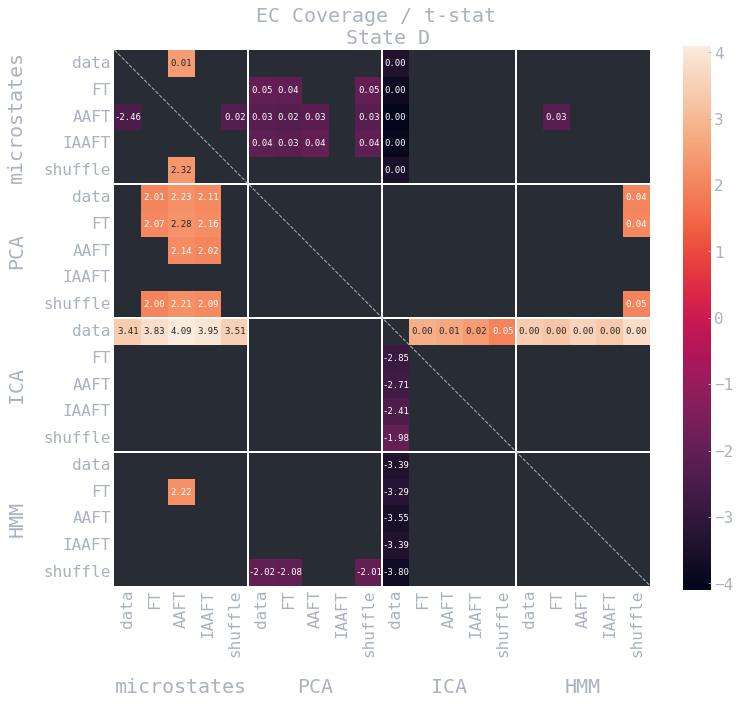

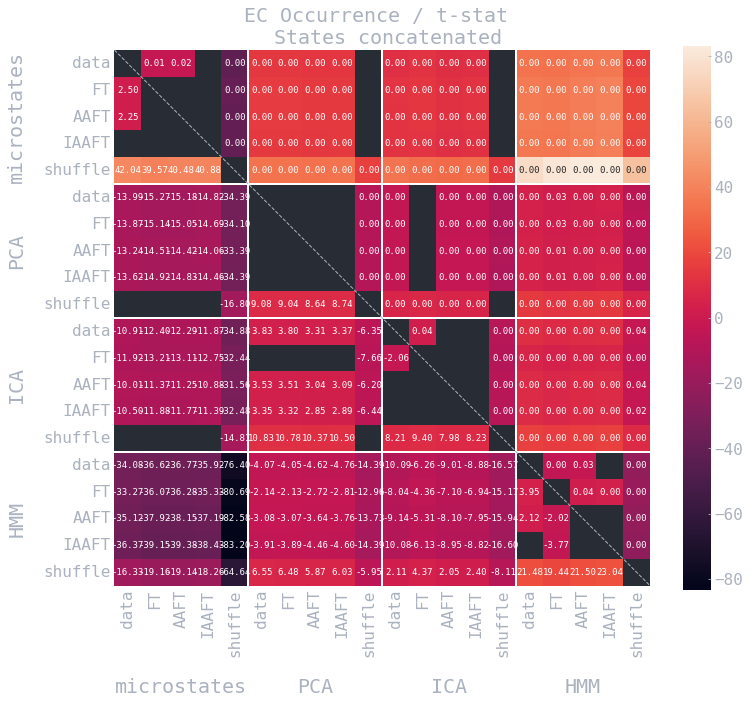

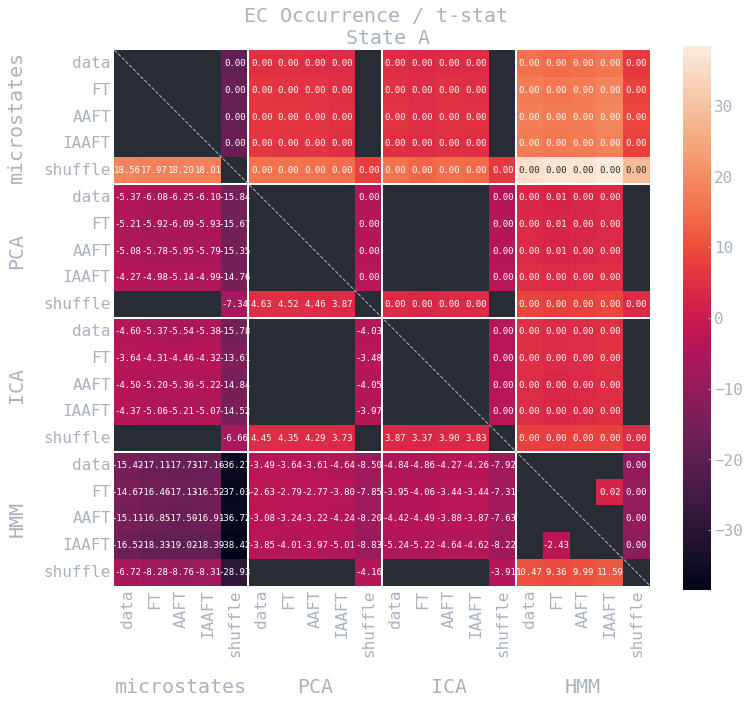

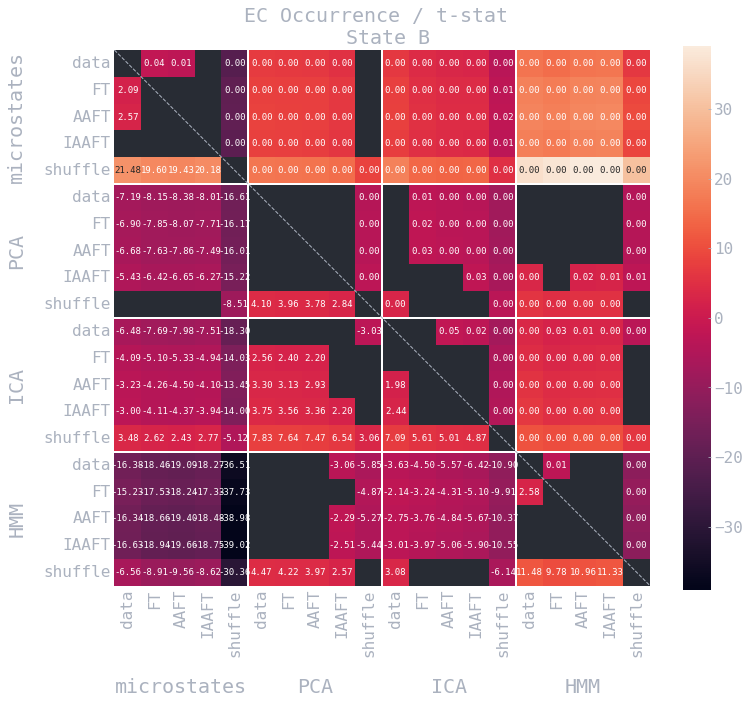

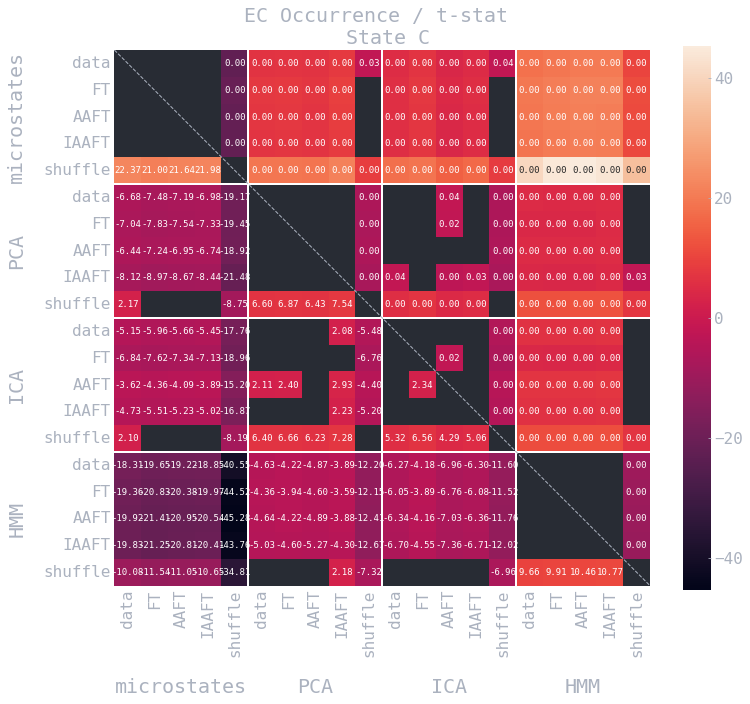

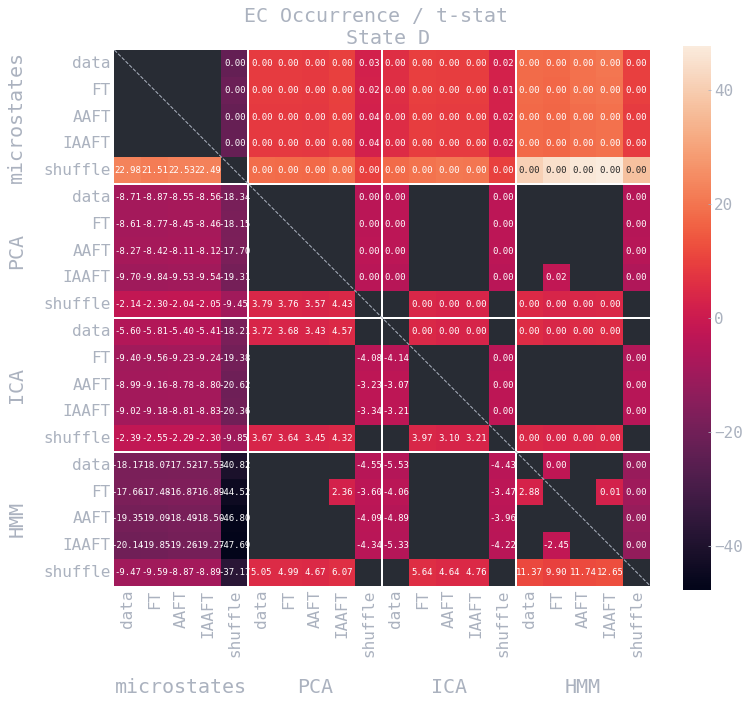

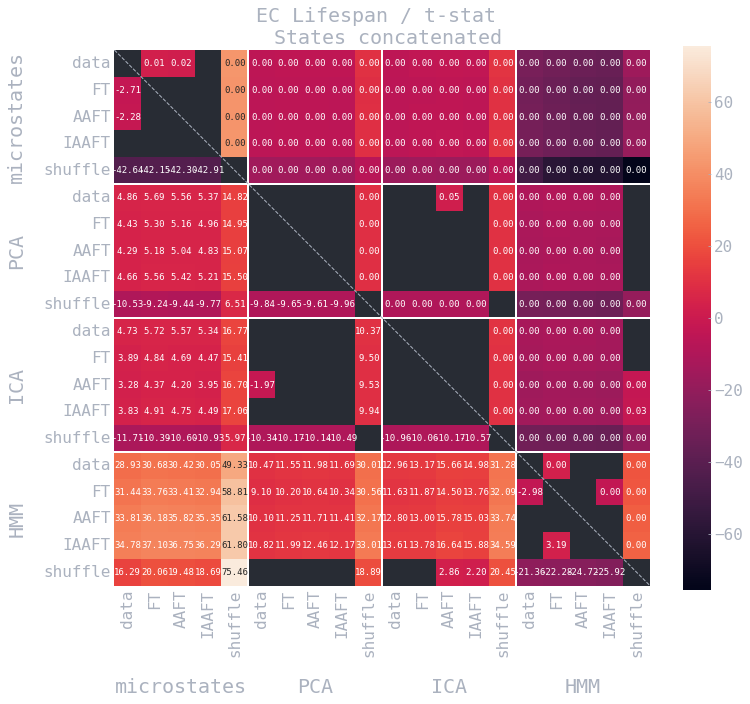

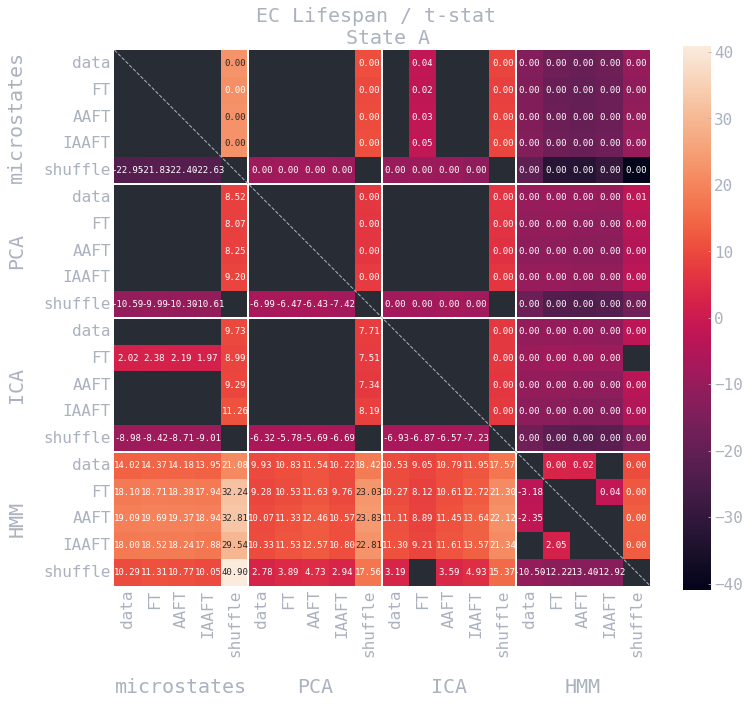

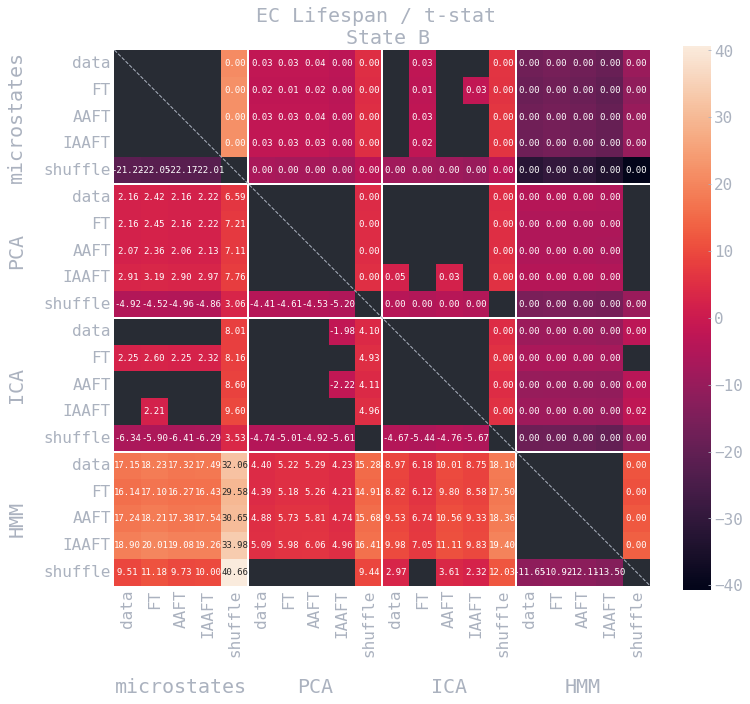

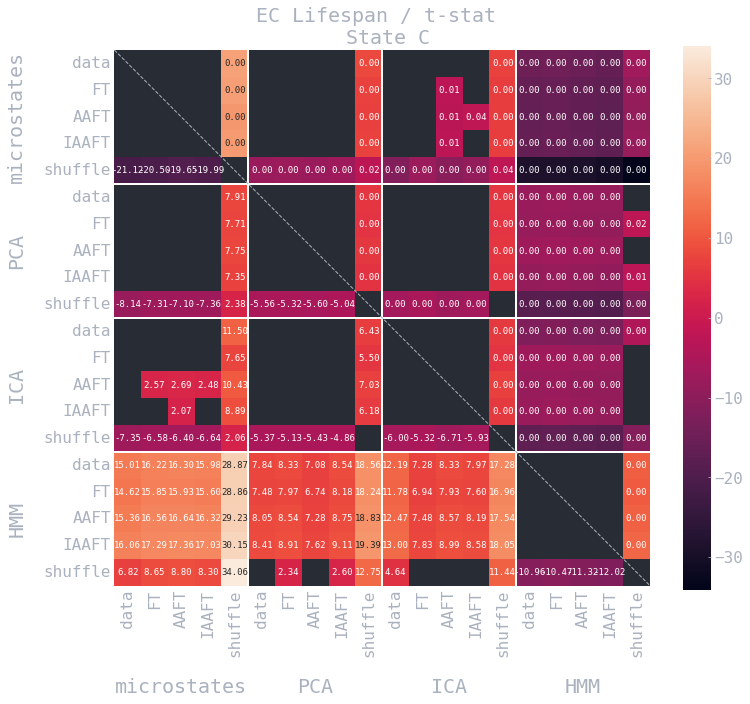

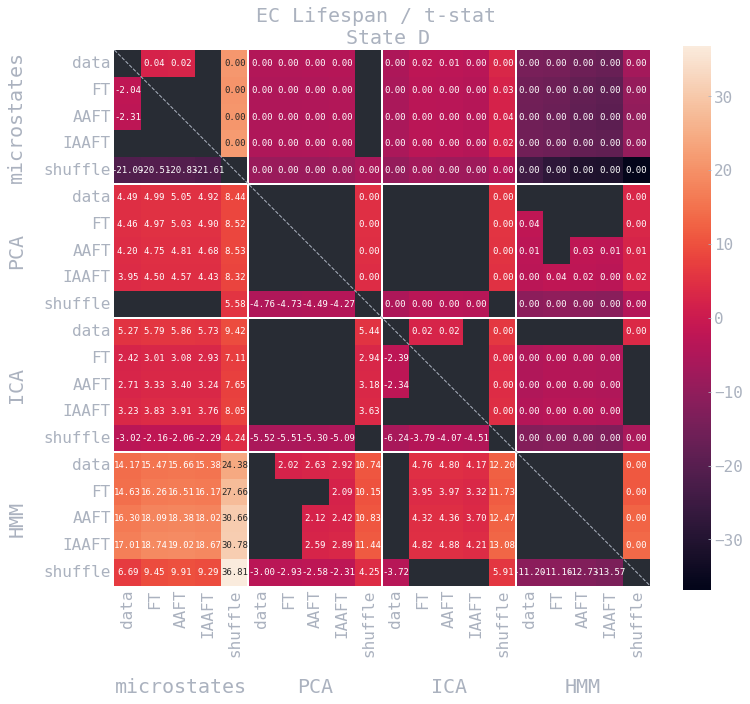

In [6]:
for k, var in enumerate(variables):
    for ms in range(len(state_names)):
        if state_names[ms] == "all":
            tit = f"EC {var.title()} / t-stat \n States concatenated"
        else:
            tit = f"EC {var.title()} / t-stat \n State {state_names[ms]}"
        plot_matrix_w_annot(
            t_stats[k, ms, ...],
            annot=True,
            mask_pvals=True,
            title=tit,
        )

In [7]:
# build transition mats
all_trans_mats = []
for df in all_dfs:
    trans_mats = {}
    for i, df2 in df.groupby(["subject_id"]):
        df2 = df2.sort_values(by="latent map")
        temp = df2.filter(like="transition").values
        assert temp.shape == (4, 4)
        np.testing.assert_allclose(temp.sum(axis=1), 1.0)
        trans_mats[i] = temp
    all_trans_mats.append(trans_mats)

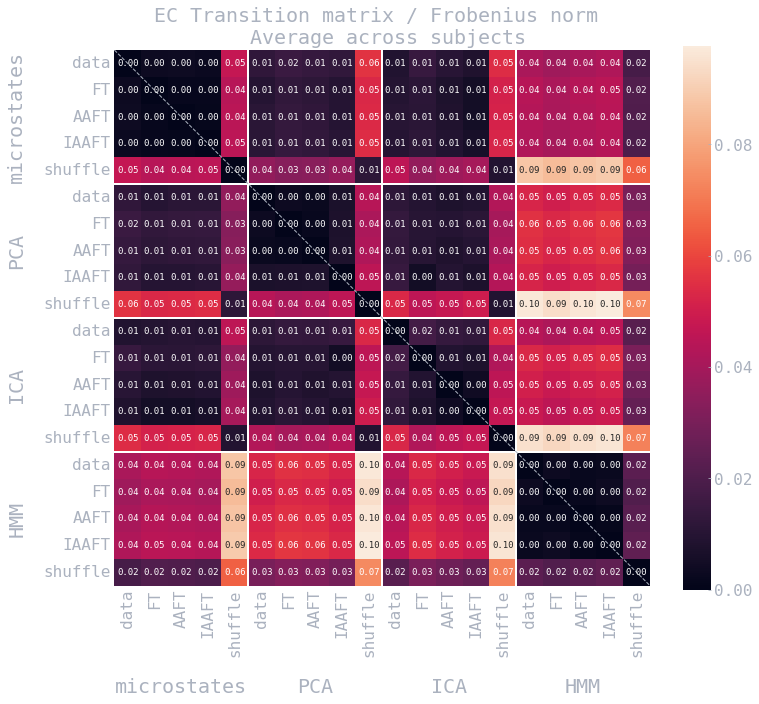

In [8]:
norm_trans_mats = np.zeros((len(ORDERED_FOLDERS), len(ORDERED_FOLDERS)))

for i in range(len(ORDERED_FOLDERS)):
    for j in range(len(ORDERED_FOLDERS)):
        mat_1 = np.array(list(all_trans_mats[i].values())).mean(axis=0)
        mat_2 = np.array(list(all_trans_mats[j].values())).mean(axis=0)
        norm_trans_mats[i, j] = np.linalg.norm(mat_1 - mat_2)
        
xr.DataArray(
    norm_trans_mats,
    dims=["decomp_type1", "decomp_type2"],
    coords={
        "decomp_type1": fold_names,
        "decomp_type2": fold_names,
    },
).to_netcdf(os.path.join(RESULTS_FOLDER, "state_transmat_norm_EC_seeded.nc"))

plot_matrix_w_annot(
    norm_trans_mats,
    annot=True,
    mask_pvals=False,
    title="EC Transition matrix / Frobenius norm \n Average across subjects",
)

Text(0.5, 0.98, 'EC Microstates')

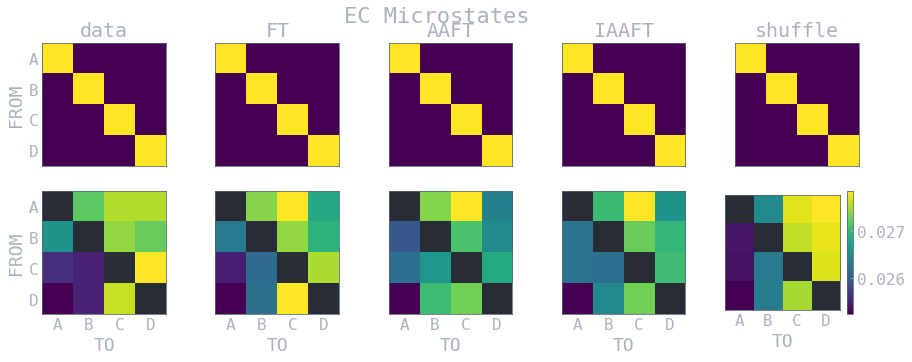

In [9]:
_, axs = plt.subplots(ncols=5, nrows=2, sharex=True, sharey=True, figsize=(15, 5))
data_types = ["data", "FT", "AAFT", "IAAFT", "shuffle"]

for i in range(5):
    mat = np.array(list(all_trans_mats[i].values())).mean(axis=0)
    axs[0, i].imshow(mat)
    mat[np.eye(mat.shape[0],dtype=bool)] = np.nan
    im = axs[1, i].imshow(mat)
    if i == 4:
        plt.colorbar(im)
    axs[0, i].set_title(data_types[i])
    
for ax in axs[:, 0]:
    ax.set_yticks(np.arange(4))
    ax.set_yticklabels(["A", "B", "C", "D"])
    ax.set_ylabel("FROM")
    
for ax in axs[-1, :]:
    ax.set_xticks(np.arange(4))
    ax.set_xticklabels(["A", "B", "C", "D"])
    ax.set_xlabel("TO")
    
plt.suptitle("EC Microstates")

In [10]:
state_names = ["A", "B", "C", "D"]
variables = ["transition->A", "transition->B", "transition->C", "transition->D"]

t_stats_trans = np.zeros(
    (len(variables), len(state_names), len(ORDERED_FOLDERS), len(ORDERED_FOLDERS), 2)
)
for i in range(len(ORDERED_FOLDERS)):
    for j in range(len(ORDERED_FOLDERS)):
        df1 = all_dfs[i]
        df2 = all_dfs[j]
        for k, var in enumerate(variables):
            for ms in range(len(state_names)):
                state_n = state_names[ms]
                ttest = pg.ttest(
                    df1[df1["latent map"] == state_n][var],
                    df2[df2["latent map"] == state_n][var],
                )
                t_stats_trans[k, ms, i, j, 0] = ttest.loc["T-test", "T"]
                t_stats_trans[k, ms, i, j, 1] = ttest.loc["T-test", "p-val"]

In [11]:
xr.DataArray(
    t_stats_trans,
    dims=["variable", "state", "decomp_type1", "decomp_type2", "value"],
    coords={
        "variable": variables,
        "state": state_names,
        "decomp_type1": fold_names,
        "decomp_type2": fold_names,
        "value": ["measure", "p-value"],
    },
).to_netcdf(os.path.join(RESULTS_FOLDER, "state_transmat_ttest_EC_seeded.nc"))

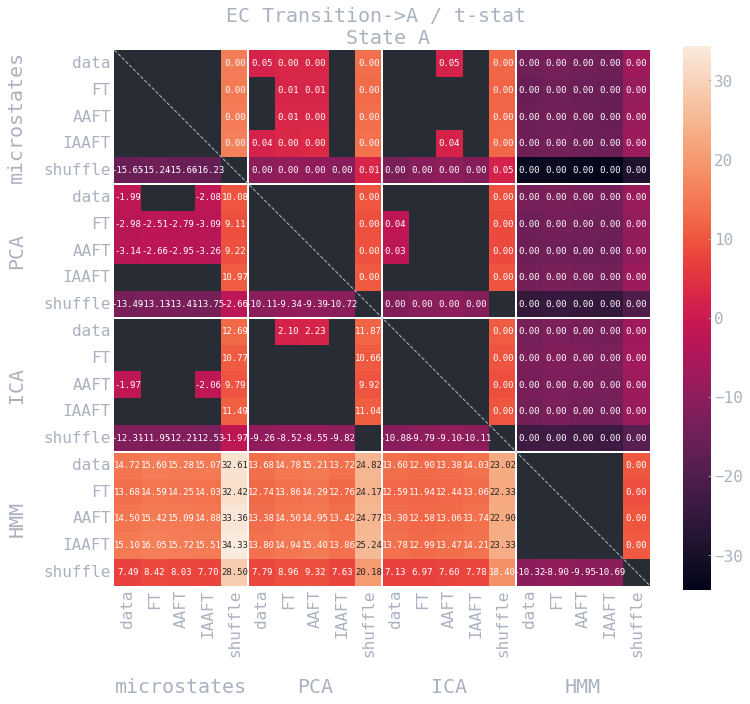

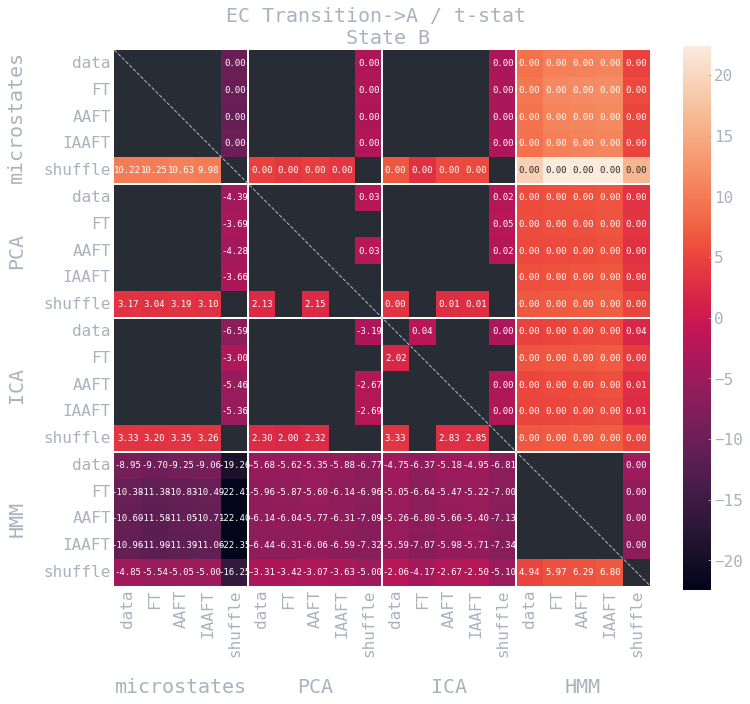

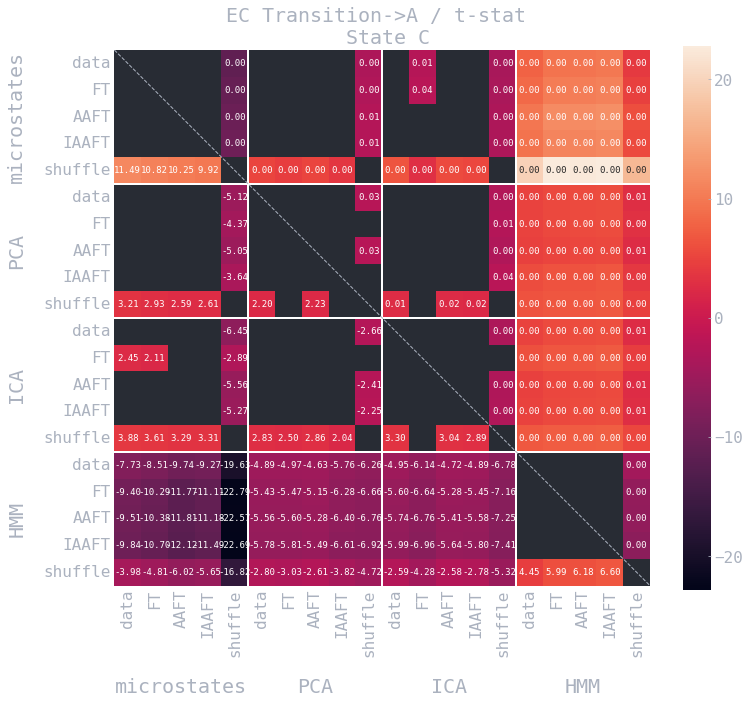

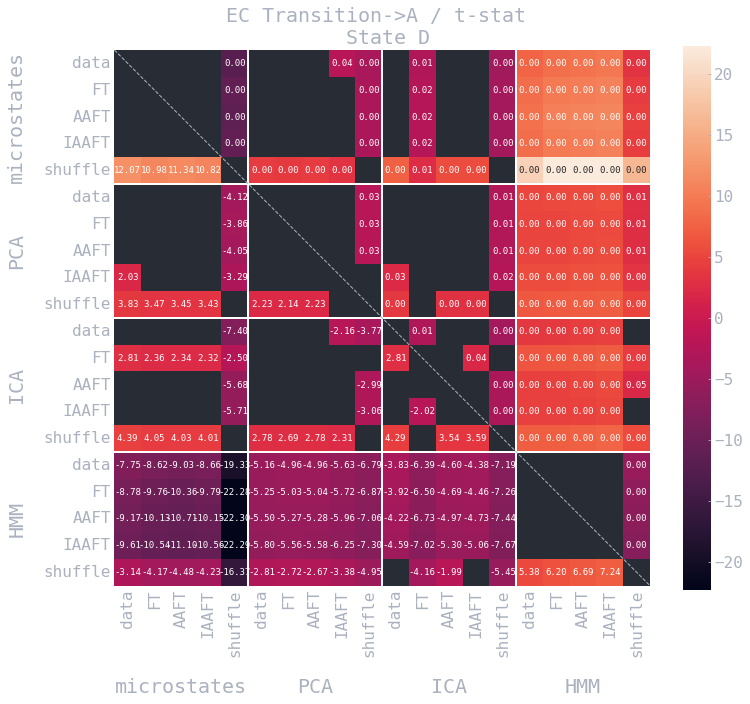

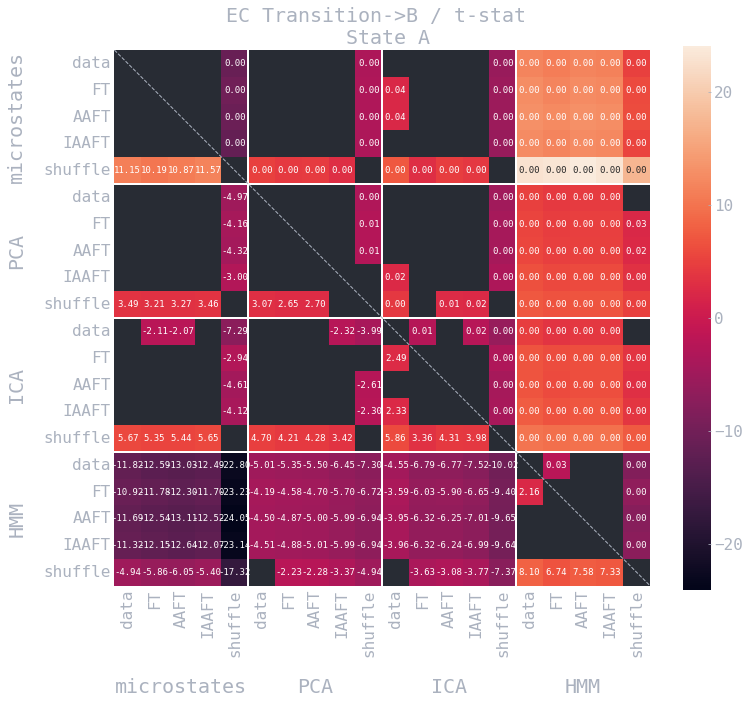

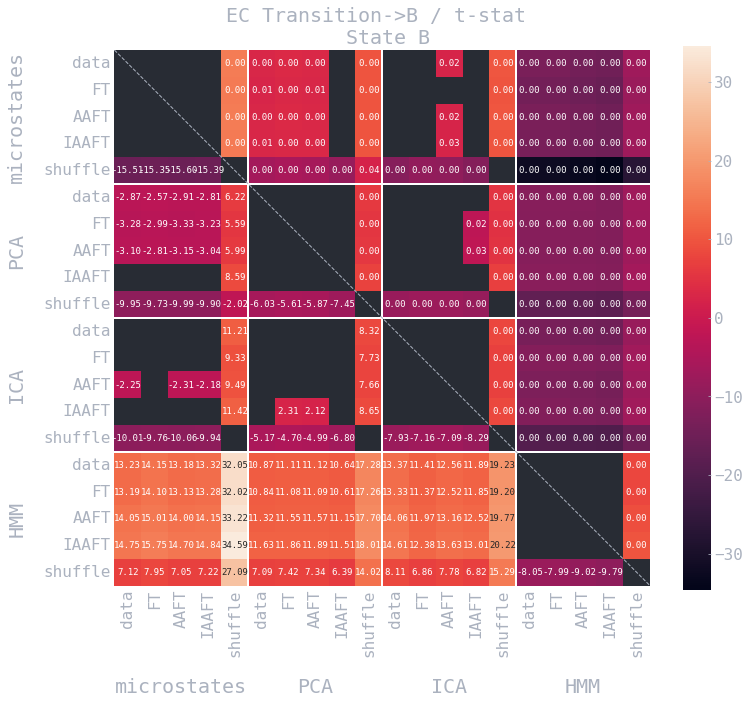

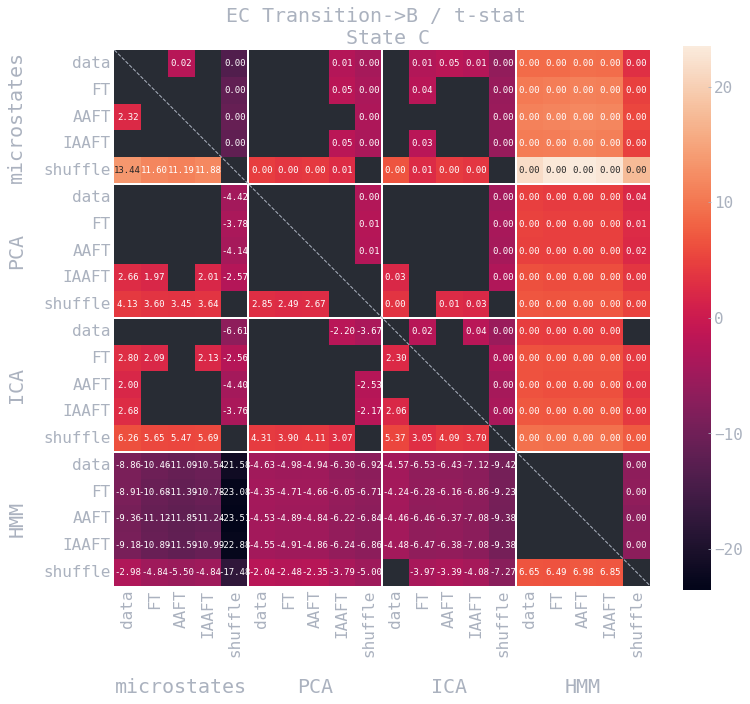

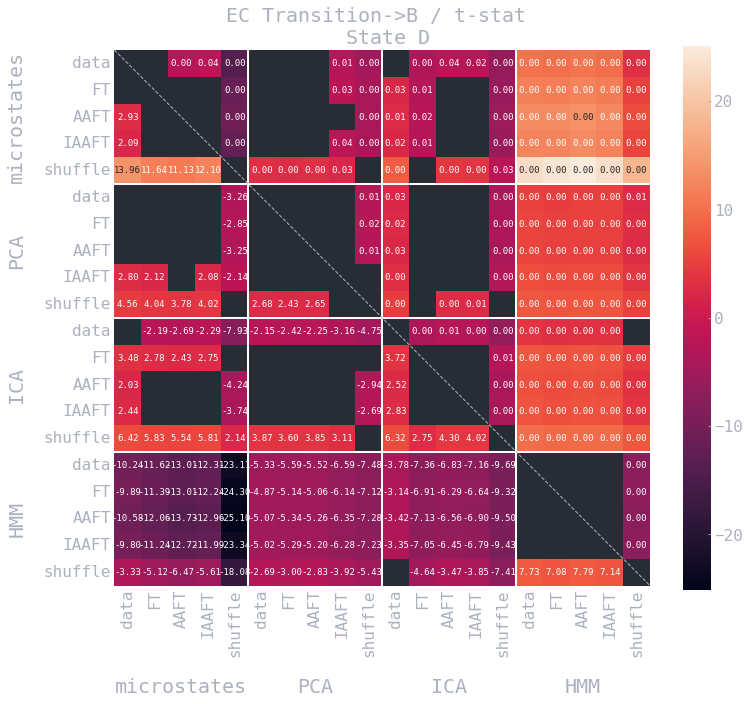

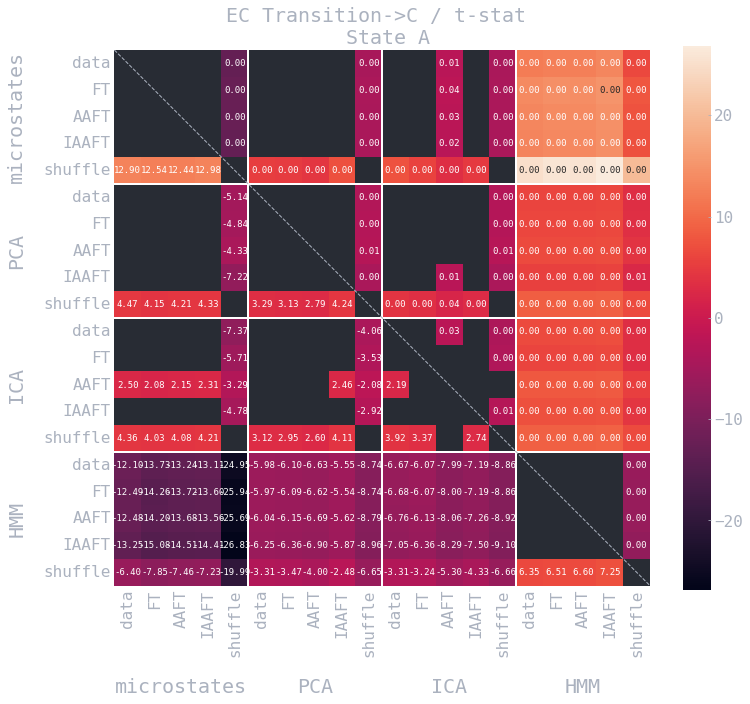

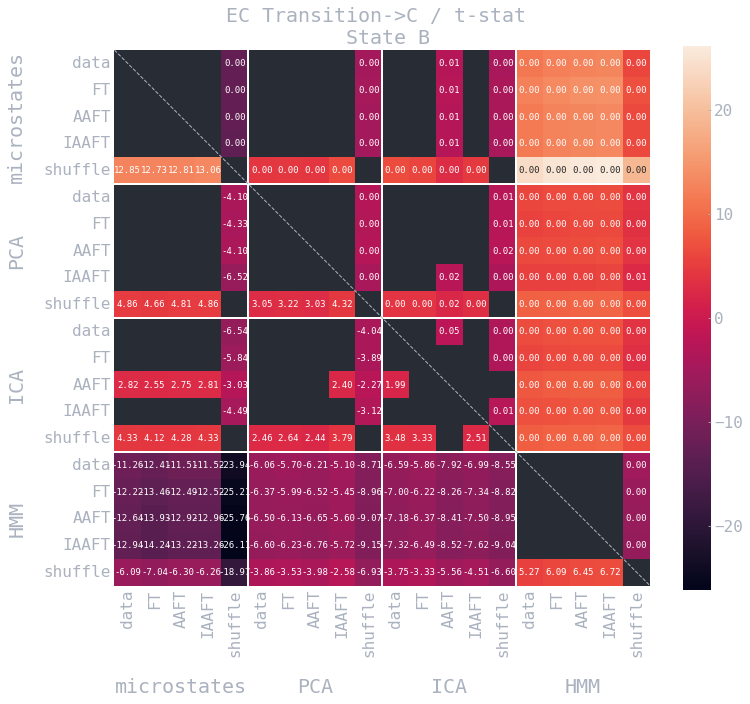

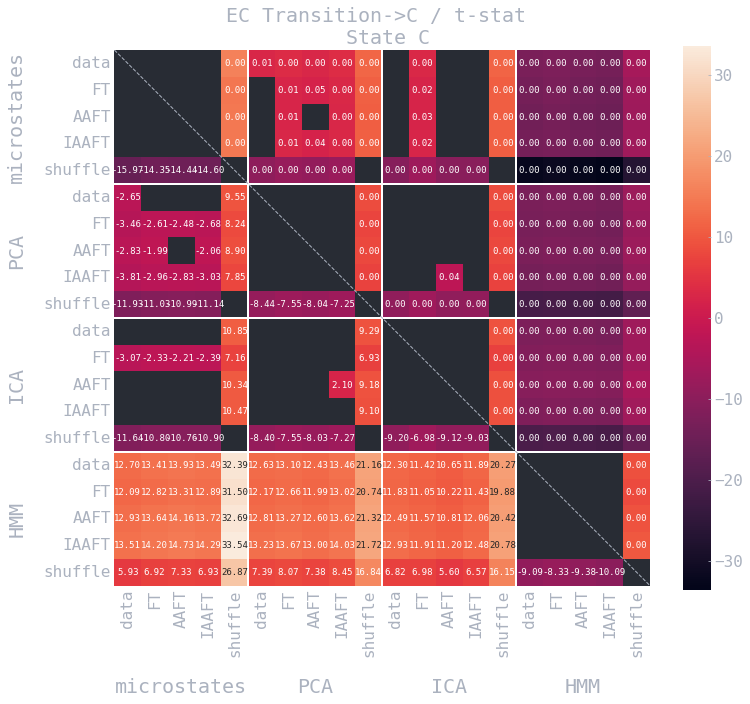

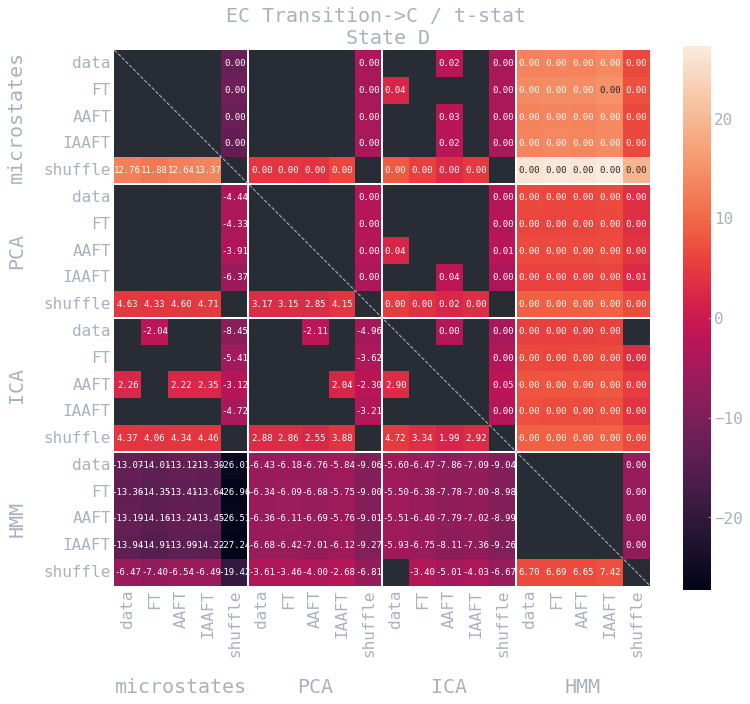

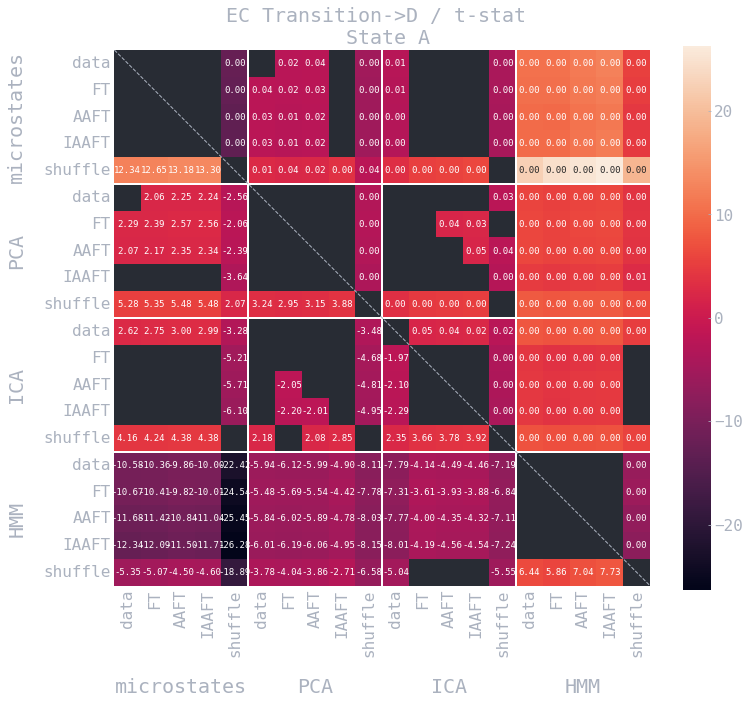

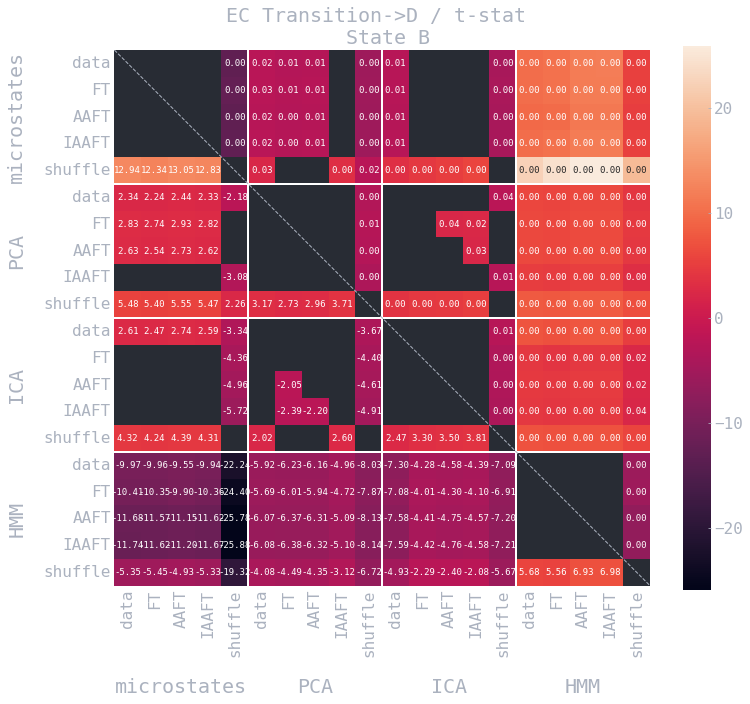

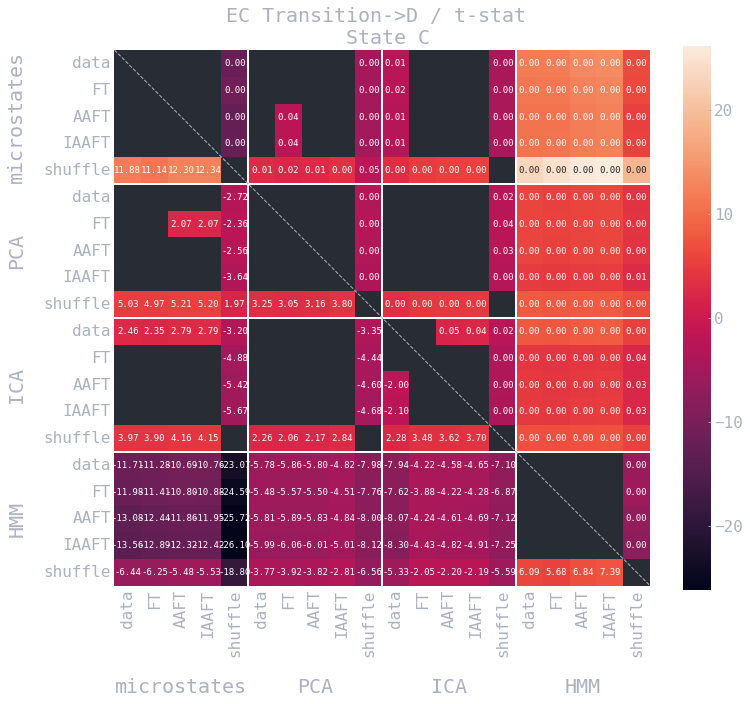

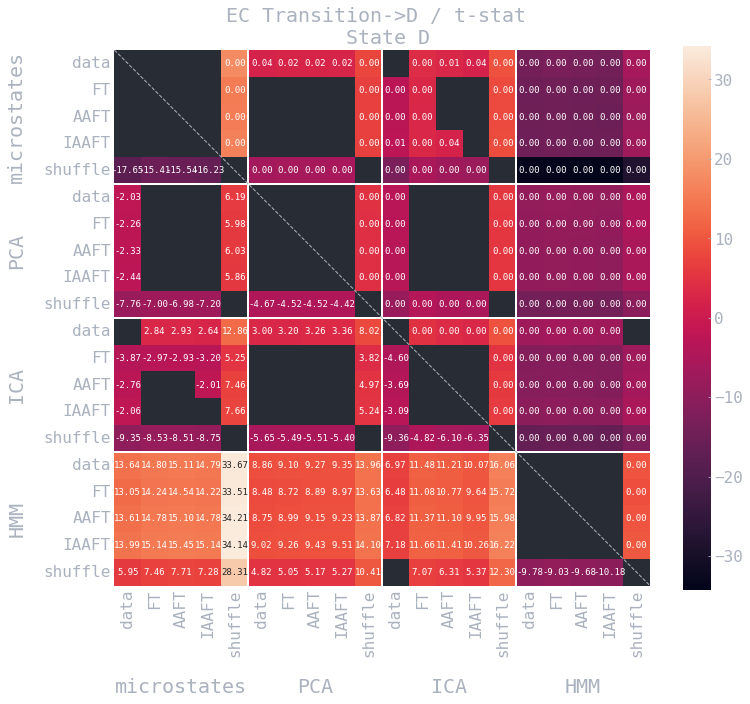

In [12]:
for k, var in enumerate(variables):
    for ms in range(len(state_names)):
        tit = f"EC {var.title()} / t-stat \n State {state_names[ms]}"
        plot_matrix_w_annot(
            t_stats_trans[k, ms, ...],
            annot=True,
            mask_pvals=True,
            title=tit,
        )